# `CNN alphabet classification`
### `building a CNN module from scaratch which will work on this`
### [dataset](https://www.kaggle.com/danrasband/asl-alphabet-test)
### `problem related to multi-class`

In [57]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os

In [58]:
dataset = r'F:\ASL_dataset'  # r => read mode
train_path = r'F:\ASL_dataset\asl-alphabet-train'
test_path = r'F:\ASL_dataset\asl-alphabet-train'

### directory list

In [59]:
dirls = os.listdir(train_path)
print('classes :',dirls.__len__())
print(dirls)

classes : 29
['A', 'B', 'C', 'D', 'del', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'nothing', 'O', 'P', 'Q', 'R', 'S', 'space', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


In [60]:
dirls = os.listdir(test_path)
print('classes :',dirls.__len__())
print(dirls)

classes : 29
['A', 'B', 'C', 'D', 'del', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'nothing', 'O', 'P', 'Q', 'R', 'S', 'space', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


### create class path and read the images, create path for images

### single class path

In [61]:
val = train_path + '\\' + dirls[0]
val

'F:\\ASL_dataset\\asl-alphabet-train\\A'

### function to do it for all

In [62]:
def loading_path(path):
    pathnames = []
    dir_list = os.listdir(path)
    uniq_class = sorted(dir_list)
    for i in range(len(uniq_class)):
        new_path = path + '\\' + uniq_class[i]
        pathnames.append(new_path)
    return (pathnames,uniq_class)

In [63]:
path,classes = loading_path(train_path)

In [64]:
path[:5]

['F:\\ASL_dataset\\asl-alphabet-train\\A',
 'F:\\ASL_dataset\\asl-alphabet-train\\B',
 'F:\\ASL_dataset\\asl-alphabet-train\\C',
 'F:\\ASL_dataset\\asl-alphabet-train\\D',
 'F:\\ASL_dataset\\asl-alphabet-train\\E']

In [65]:
classes[:5]

['A', 'B', 'C', 'D', 'E']

### for each and every class we have correspoinding path
### now we are going with each and every image and read the image

In [66]:
def labelling_images(uniq_path, uniq_labels):
    img_path = []
    label = []
    for path,Label in zip(uniq_path,uniq_labels):
        dir_list = os.listdir(path)
        for i in dir_list:
            img_dir_list = path + '\\' + i
            img_path.append(img_dir_list)
            label.append(Label)
    return (img_path,label)

In [67]:
img_path,label = labelling_images(path,classes)

In [68]:
img_path[:5]

['F:\\ASL_dataset\\asl-alphabet-train\\A\\A0001_test.jpg',
 'F:\\ASL_dataset\\asl-alphabet-train\\A\\A0002_test.jpg',
 'F:\\ASL_dataset\\asl-alphabet-train\\A\\A0003_test.jpg',
 'F:\\ASL_dataset\\asl-alphabet-train\\A\\A0004_test.jpg',
 'F:\\ASL_dataset\\asl-alphabet-train\\A\\A0005_test.jpg']

In [69]:
img_path.__len__()

870

In [70]:
label[:5]

['A', 'A', 'A', 'A', 'A']

In [71]:
os.listdir('F:\\ASL_dataset\\asl-alphabet-train\\A').__len__()

30

### each directory have 30 images
### there are 870/30 = 29 classes
### plot single image

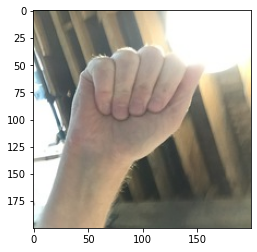

In [72]:
img = cv2.imread(img_path[0])
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [73]:
img.shape

(200, 200, 3)

### we have to create an array because CNN accept things in array

In [74]:
labels = np.array(label)

### resize all image

In [75]:
def img_array(paths):
    arr_list = []
    for i in paths:
        img = cv2.resize(cv2.imread(i),(150,150))
        arr_list.append(img)
    return (arr_list)

In [76]:
arr_img = img_array(img_path)

In [77]:
arr_img = np.array(arr_img)

In [78]:
print(type(arr_img[0]))

<class 'numpy.ndarray'>


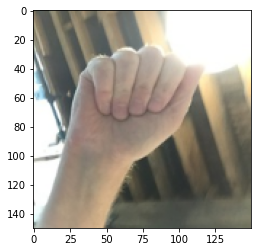

In [79]:
plt.imshow(cv2.cvtColor(arr_img[0],cv2.COLOR_BGR2RGB))

### build our model

In [80]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Dropout,GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

In [82]:
X_train,X_test,y_train,y_test = train_test_split(arr_img,labels,test_size=0.2)
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(696, 150, 150, 3) (696,) (174, 150, 150, 3) (174,)


### we have labels in form of alphabets we need to encode them by one hot encoding

In [84]:
from sklearn.preprocessing import OneHotEncoder
vals = OneHotEncoder()
uniq_labels = np.unique(y_train)
print(uniq_labels.__len__())
y_train_labels = vals.fit_transform(y_train.reshape(-1,1)).toarray()
y_test_labels = vals.fit_transform(y_test.reshape(-1,1)).toarray()

29


In [86]:
y_train_labels[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [87]:
y_train[:5]

array(['K', 'X', 'A', 'L', 'Q'], dtype='<U7')

### model building

In [89]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=5,padding='same',activation='relu',input_shape=(150,150,3)))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
## padding=same, apply padding; padding=valid, no padding

model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(29,activation='softmax'))

In [90]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 150, 150, 32)      2432      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 148, 148, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 74, 74, 128)       73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 128)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 256)      

In [92]:
model.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.01),metrics=['accuracy'])
hist = model.fit(X_train,y_train_labels,batch_size=32,validation_split=0.3,epochs=5,verbose=2)

Epoch 1/5
16/16 [==============================] - 199s 12s/step - loss: 42853.9492 - accuracy: 0.0246 - val_loss: 3.3394 - val_accuracy: 0.0574
Epoch 2/5
16/16 [==============================] - 139s 9s/step - loss: 3.1589 - accuracy: 0.1478 - val_loss: 3.1389 - val_accuracy: 0.1388
Epoch 3/5
16/16 [==============================] - 137s 9s/step - loss: 2.5128 - accuracy: 0.3306 - val_loss: 4.3562 - val_accuracy: 0.1914
Epoch 4/5
16/16 [==============================] - 136s 9s/step - loss: 1.8077 - accuracy: 0.4969 - val_loss: 15.2702 - val_accuracy: 0.1579
Epoch 5/5
16/16 [==============================] - 138s 9s/step - loss: 1.7690 - accuracy: 0.5975 - val_loss: 7.2965 - val_accuracy: 0.1627


### industry: it's always a best practice to split data in three modules:  train, test, validation

## `END -------------------------------------------`